In [1]:
%matplotlib inline

In [25]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Timestamp

import hillmaker as hm

In [26]:
file_stopdata = 'data/unit_stop_log_Experiment1_Scenario1_Rep1.csv'

scenario_name = 'log_unitocc_test_steadystate'
in_fld_name = 'EnteredTS'
out_fld_name = 'ExitedTS'
cat_fld_name = 'Unit'
start_analysis = '6/24/2015 00:00'
end_analysis = '6/16/2016 00:00'

# Optional inputs

tot_fld_name = 'OBTot'
bin_size_mins = 1440
includecats = ['LDR','PP']

df = pd.read_csv(file_stopdata)
basedate = Timestamp('20150215 00:00:00')
df['EnteredTS'] = df.apply(lambda row:
                           Timestamp(round((basedate + pd.DateOffset(hours=row['Entered'])).value,-9)), axis=1)

df['ExitedTS'] = df.apply(lambda row:
                          Timestamp(round((basedate + pd.DateOffset(hours=row['Exited'])).value,-9)), axis=1)

In [36]:
a_start = pd.Timestamp(start_analysis)
a_end = pd.Timestamp(end_analysis)
print(a_start,a_end)

2015-06-24 00:00:00 2016-06-16 00:00:00


In [38]:
left_PP_df = df[(df['EnteredTS'] < a_start) & (a_start <= df['ExitedTS']) &  (df['ExitedTS'] < a_end) & (df['Unit'] == 'PP')]

In [39]:
print(left_PP_df.shape)
left_PP_df[:][['EnteredTS','ExitedTS']]

(30, 17)


,EnteredTS,ExitedTS
6558,2015-06-21 13:54:53,2015-06-24 00:20:17
6562,2015-06-22 13:42:20,2015-06-24 00:44:04
6567,2015-06-22 01:06:01,2015-06-24 04:27:04
6575,2015-06-21 15:20:06,2015-06-24 09:40:08
6576,2015-06-15 17:39:59,2015-06-24 09:47:58
6583,2015-06-20 11:16:04,2015-06-24 13:46:49
6586,2015-06-22 19:32:53,2015-06-24 16:39:49
6590,2015-06-23 20:59:23,2015-06-24 19:16:10
6592,2015-06-19 08:52:54,2015-06-24 19:54:19
6594,2015-06-19 19:10:27,2015-06-24 20:44:15


In [45]:
occ_df = pd.read_csv('testing/occ_stats_summary_log_unitocc_test_steadystate_PP.csv')

In [46]:
bydt_df = pd.read_csv('testing/bydatetime_log_unitocc_test_steadystate_PP.csv')

In [47]:
pp_occ = bydt_df[(bydt_df['category'] == 'PP')]['occupancy']

In [22]:
ldr_occ = bydt_df[(bydt_df['category'] == 'LDR')]['occupancy']

(array([  1.,   0.,   1.,   1.,   3.,   0.,  12.,  13.,  26.,  24.,  39.,
         40.,  52.,  47.,  43.,  49.,  35.,  24.,  18.,  23.]),
 array([ 16.3093287 ,  17.79386227,  19.27839583,  20.7629294 ,
         22.24746296,  23.73199653,  25.21653009,  26.70106366,
         28.18559722,  29.67013079,  31.15466435,  32.63919792,
         34.12373148,  35.60826505,  37.09279861,  38.57733218,
         40.06186574,  41.54639931,  43.03093287,  44.51546644,  46.        ]),
 <a list of 20 Patch objects>)

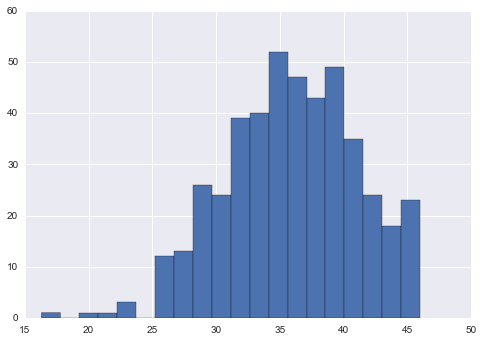

In [8]:
plt.hist(pp_occ.values,20)

(array([  1.,   0.,   0.,   1.,   1.,   5.,  12.,  11.,  28.,  50.,  41.,
         54.,  50.,  46.,  43.,  24.,  35.,  25.,  13.,  11.]),
 array([  0.  ,   0.65,   1.3 ,   1.95,   2.6 ,   3.25,   3.9 ,   4.55,
          5.2 ,   5.85,   6.5 ,   7.15,   7.8 ,   8.45,   9.1 ,   9.75,
         10.4 ,  11.05,  11.7 ,  12.35,  13.  ]),
 <a list of 20 Patch objects>)

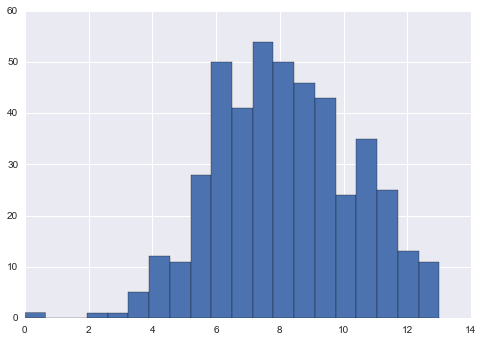

In [9]:
plt.hist(ldr_occ.values,20)

In [11]:
bydt_df.head()

,category,datetime,arrivals,departures,occupancy,day_of_week,bin_of_day,bin_of_week
0,LDR,2015-02-15 00:00:00,12,7,2.697824,6,0,6
1,LDR,2015-02-16 00:00:00,17,17,6.657824,0,0,0
2,LDR,2015-02-17 00:00:00,16,13,6.210556,1,0,1
3,LDR,2015-02-18 00:00:00,17,18,7.160961,2,0,2
4,LDR,2015-02-19 00:00:00,16,17,7.375949,3,0,3


In [51]:
bydt_df['datetime'].min()

'2015-03-24'

In [48]:
pp_occ.describe()

count    437.000000
mean      36.068304
std        5.123482
min       20.479213
25%       32.514062
50%       36.058218
75%       39.820926
max       46.000000
Name: occupancy, dtype: float64

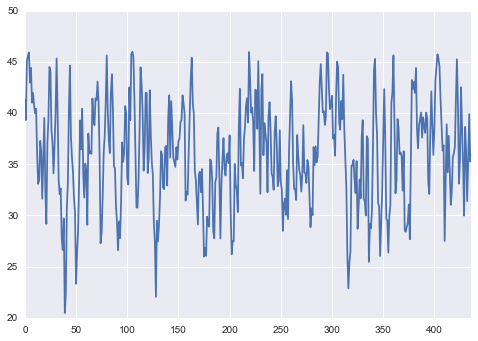

In [49]:
sns.tsplot(pp_occ);

In [15]:
pp_occ.head()

488     2.773785
489    10.258866
490    20.487118
491    31.099259
492    34.894653
Name: occupancy, dtype: float64